In [1]:
import formulas

In [2]:
func = formulas.Parser().ast('=(1 + 1) + B3 / A2')[1].compile()

In [3]:
list(func.inputs)

['A2', 'B3']

In [4]:
fpath, dir_output = 'Formula Test.xlsx', 'output'
xl_model = formulas.ExcelModel().loads(fpath).finish()
xl_model.calculate()

0it [00:00, ?it/s]


Solution({"'[Formula Test.xlsx]SHEET1'!B2": <Ranges>('[Formula Test.xlsx]SHEET1'!B2)=[['My name']], "'[Formula Test.xlsx]SHEET1'!B3": <Ranges>('[Formula Test.xlsx]SHEET1'!B3)=[['Jon']], "'[Formula Test.xlsx]SHEET1'!C2": <Ranges>('[Formula Test.xlsx]SHEET1'!C2)=[['Your Name']], "'[Formula Test.xlsx]SHEET1'!C3": <Ranges>('[Formula Test.xlsx]SHEET1'!C3)=[['Molly']], "'[Formula Test.xlsx]SHEET1'!D2": <Ranges>('[Formula Test.xlsx]SHEET1'!D2)=[['Our Names']], "'[Formula Test.xlsx]SHEET1'!D3": <Ranges>('[Formula Test.xlsx]SHEET1'!D3)=[['JonMolly']]})

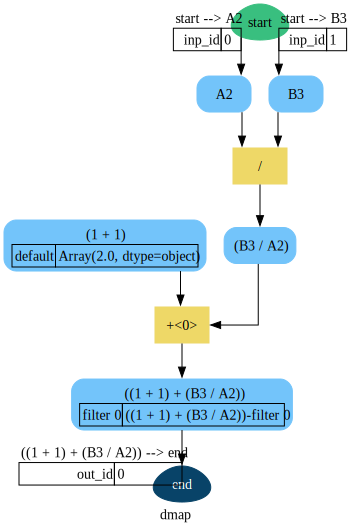

In [5]:
func.plot(view=False)

In [6]:
import formulas

fpath, dir_output = 'Formula Test.xlsx', 'output'

xl_model = formulas.ExcelModel().loads(fpath).finish()

xl_model.calculate()

0it [00:00, ?it/s]


Solution({"'[Formula Test.xlsx]SHEET1'!B2": <Ranges>('[Formula Test.xlsx]SHEET1'!B2)=[['My name']], "'[Formula Test.xlsx]SHEET1'!B3": <Ranges>('[Formula Test.xlsx]SHEET1'!B3)=[['Jon']], "'[Formula Test.xlsx]SHEET1'!C2": <Ranges>('[Formula Test.xlsx]SHEET1'!C2)=[['Your Name']], "'[Formula Test.xlsx]SHEET1'!C3": <Ranges>('[Formula Test.xlsx]SHEET1'!C3)=[['Molly']], "'[Formula Test.xlsx]SHEET1'!D2": <Ranges>('[Formula Test.xlsx]SHEET1'!D2)=[['Our Names']], "'[Formula Test.xlsx]SHEET1'!D3": <Ranges>('[Formula Test.xlsx]SHEET1'!D3)=[['JonMolly']]})

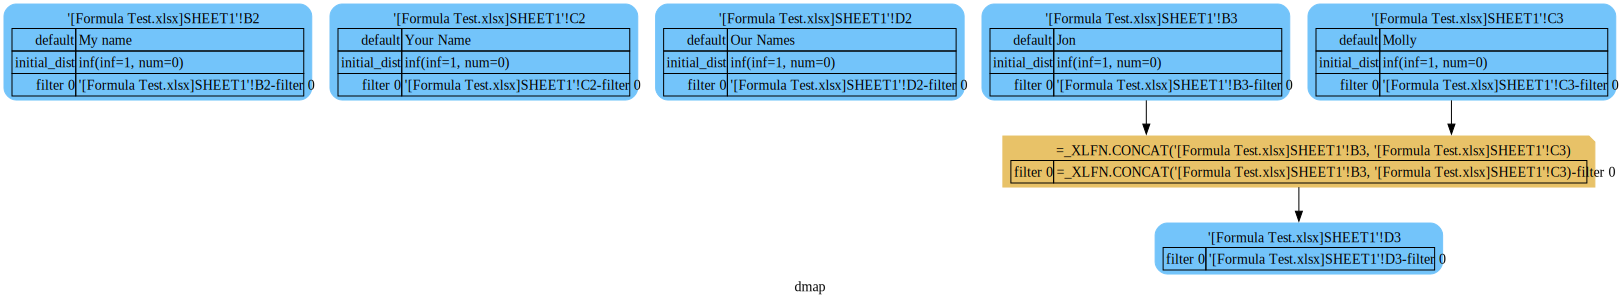

In [7]:
dsp = xl_model.dsp
dsp.plot(view=False)

In [ ]:
func = xl_model.compile(
    inputs=[
        "'[Formula Test.xlsx]SHEET1'!B3",
        "'[Formula Test.xlsx]SHEET1'!C3",
    ],
    outputs=[
        "'[Formula Test.xlsx]SHEET1'!D3",
    ]
) 
func

In [10]:
[v.value[0, 0] for v in func("Molly", "Jono")]

TypeError: 'Ranges' object is not iterable